In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
players = pd.read_csv('combined_data_set.csv')

In [326]:
players

,Name,Main_Position,Rating,Price,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,...,Card_Version_World Cup Stories,Card_Version_World Cup TOTT,Card_Version_World Cup TOTT SBC,Card_Version_non-rare,Attack_Workrate_H,Attack_Workrate_L,Attack_Workrate_M,Defense_Workrate_H,Defense_Workrate_L,Defense_Workrate_M
0,Pelé,CAM,98,5520000.0,5,4,95.0,96,93,96,...,0,0,0,0,1,0,0,0,0,1
1,Lionel Messi,RW,98,7030000.0,4,4,93.0,98,97,99,...,0,0,0,0,1,0,0,0,1,0
2,Karim Benzema,CF,97,3500000.0,4,5,92.0,97,90,94,...,0,0,0,0,1,0,0,0,0,1
3,Kylian Mbappé,ST,97,14370000.0,5,4,99.0,96,88,98,...,0,0,0,0,1,0,0,0,1,0
4,Kevin De Bruyne,CM,97,3880000.0,4,5,85.0,94,98,94,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18379,Antonio D'Silva,GK,46,200.0,0,3,51.0,45,46,50,...,0,0,0,0,0,0,1,0,0,1
18380,Jiahui Zhang,CM,46,200.0,0,3,54.0,37,46,46,...,0,0,0,0,0,0,1,0,0,1
18381,Ziye Zhao,RW,46,200.0,2,3,63.0,48,40,47,...,0,0,0,0,0,0,1,0,0,1
18382,Junjie Wu,LB,46,200.0,2,3,55.0,25,29,34,...,0,0,0,0,0,0,1,0,0,1


In [327]:
players['Main_Position'].value_counts()

CB     3207
ST     2667
CM     2200
GK     1938
CDM    1498
RB     1113
LB     1107
CAM    1039
RM      898
LM      867
RW      524
LW      507
RWB     320
LWB     306
CF      193
Name: Main_Position, dtype: int64

In [328]:
# Splitting data into 3 Positions
attackers = players[players['Main_Position'].isin(['ST', 'LW', 'RW', 'RM', 'LM', 'CF'])]
midfielders = players[players['Main_Position'].isin(['CM','CDM','CAM'])]
defenders = players[players['Main_Position'].isin(['RB', 'RWB', 'LB', 'LWB', 'CB'])]
goalkeepers = players[players['Main_Position'] == 'GK']

position_list = [attackers, midfielders, defenders, goalkeepers]

In [329]:
# RENAMING COLUMNS FOR CLARITY PURPOSES
goalkeepers = goalkeepers.rename(columns={'Pace / Diving': 'Diving', 'Shooting / Handling': 'Handling',
                           'Passing / Kicking': 'Kicking', 'Dribbling / Reflexes': 'Reflexes',
                           'Physical / Positioning':'Positioning', 'Defence / Speed': 'Speed'})

attackers = attackers.rename(columns={'Pace / Diving': 'Pace', 'Shooting / Handling': 'Shooting',
                           'Passing / Kicking': 'Passing', 'Dribbling / Reflexes': 'Dribbling',
                           'Physical / Positioning':'Physical', 'Defence / Speed': 'Defence'})

midfielders = midfielders.rename(columns={'Pace / Diving': 'Pace', 'Shooting / Handling': 'Shooting',
                           'Passing / Kicking': 'Passing', 'Dribbling / Reflexes': 'Dribbling',
                           'Physical / Positioning':'Physical', 'Defence / Speed': 'Defence'})

defenders = defenders.rename(columns={'Pace / Diving': 'Pace', 'Shooting / Handling': 'Shooting',
                           'Passing / Kicking': 'Passing', 'Dribbling / Reflexes': 'Dribbling',
                           'Physical / Positioning':'Physical', 'Defence / Speed': 'Defence'})


In [330]:
player_count  = pd.Series([len(attackers), len(midfielders), len(defenders), len(goalkeepers)], index=['Attackers', 'Midfielders', 'Defenders', 'Goalkeepers'])

In [331]:
player_count

Attackers      5656
Midfielders    4737
Defenders      6053
Goalkeepers    1938
dtype: int64

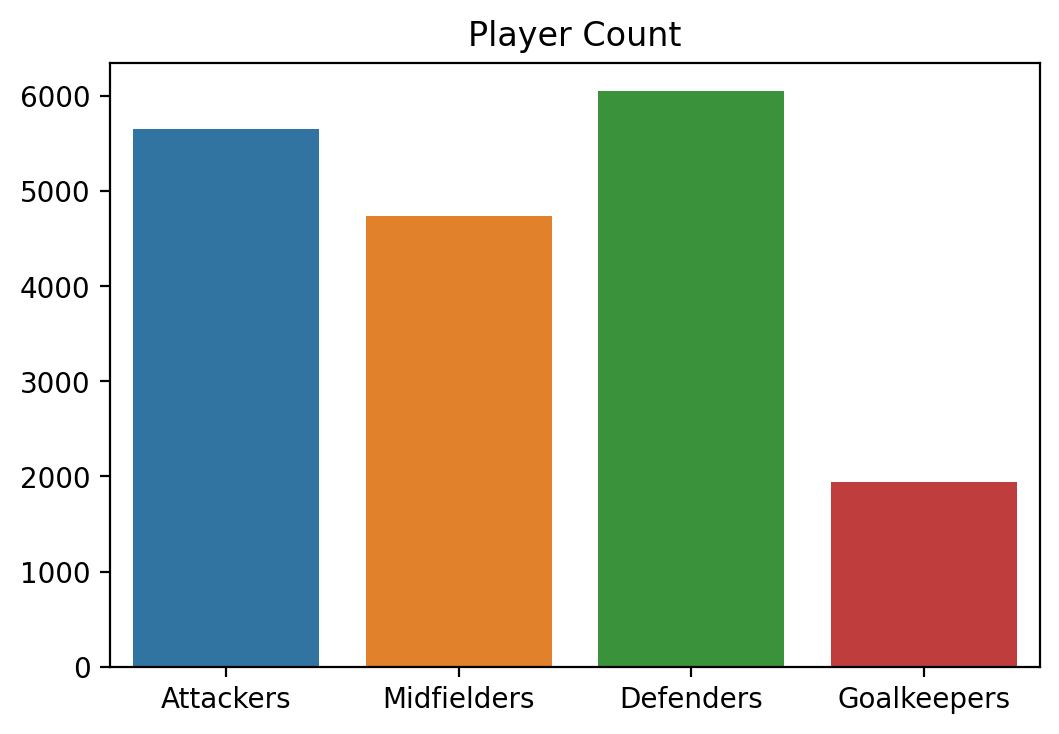

In [332]:
plt.figure(dpi=200)
sns.barplot(x=player_count.index, y=player_count.values)
plt.title('Player Count')
plt.savefig('Player_Count_fig')

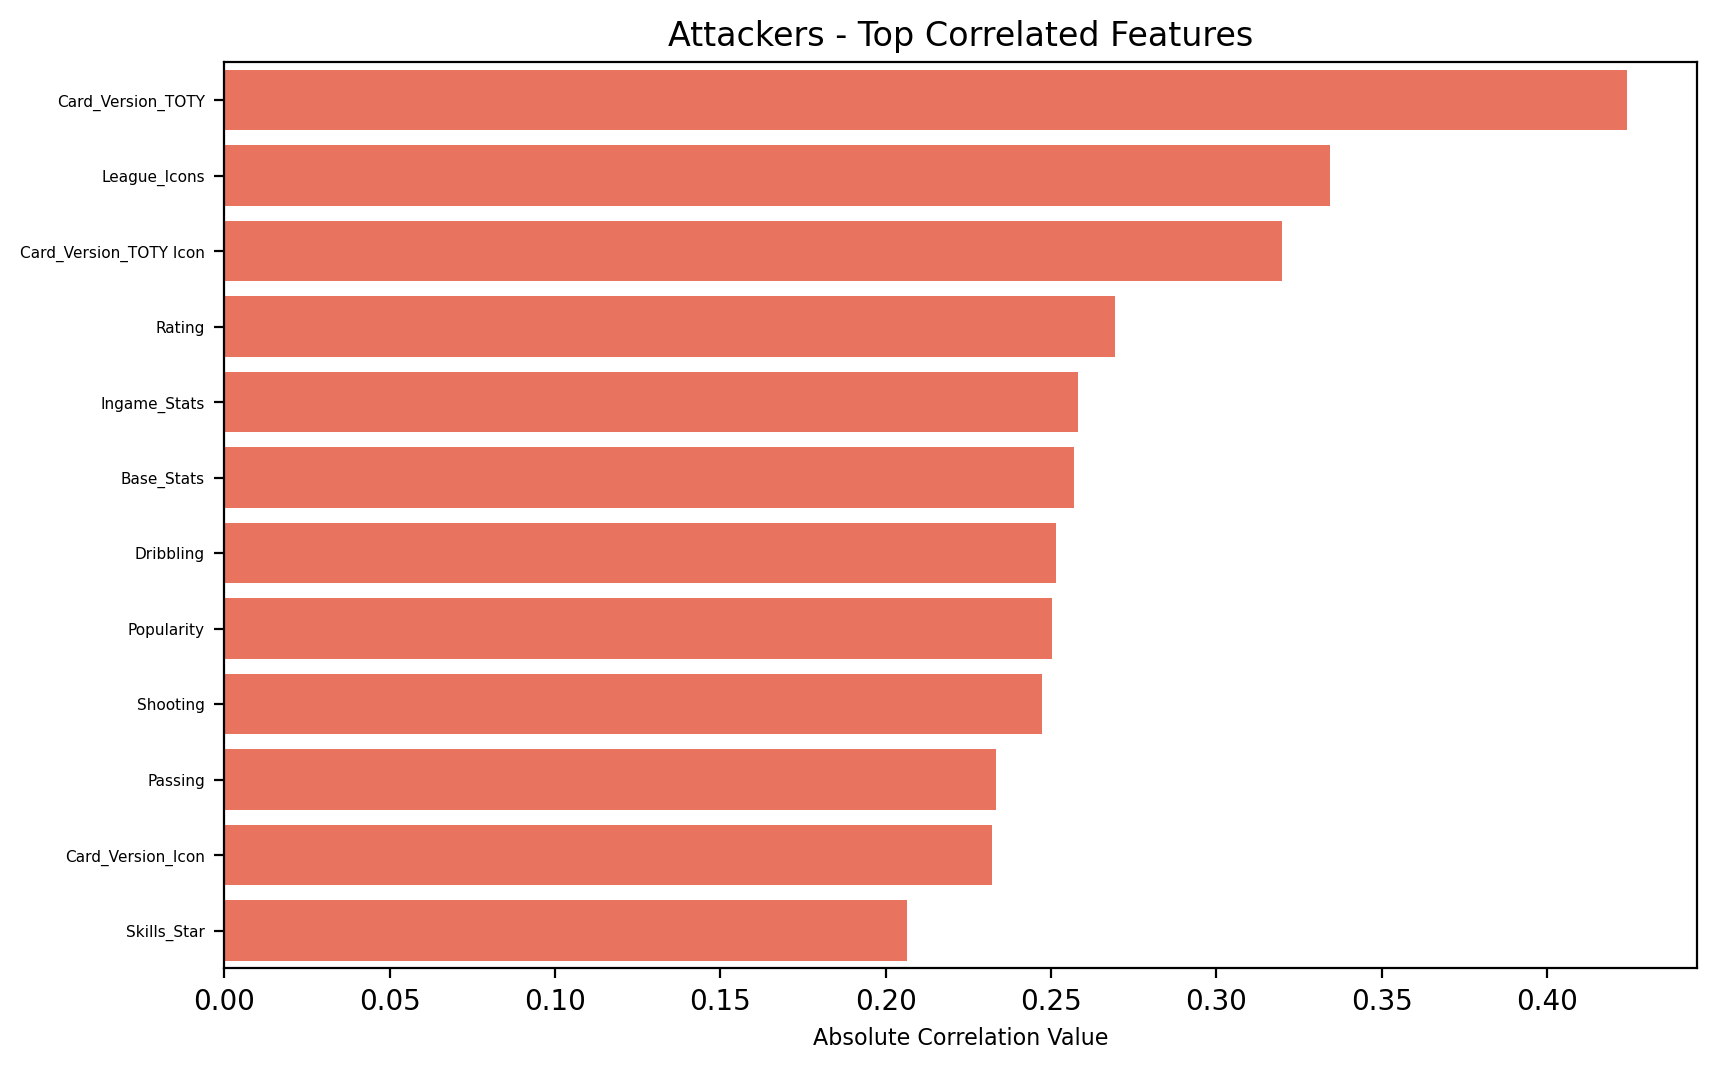

In [333]:
# TOP CORRELATED FEATURES
top_features_attackers = attackers.corr()['Price'].sort_values(ascending=False)[1:13]
plt.figure(figsize = (9.5, 6), dpi=200)
sns.barplot(x=top_features_attackers.values, y=top_features_attackers.index, color="tomato")
plt.title('Attackers - Top Correlated Features')
plt.xlabel("Absolute Correlation Value", fontdict={"fontsize": 8})
plt.yticks(fontsize=5.5)

plt.savefig('attackers_features')

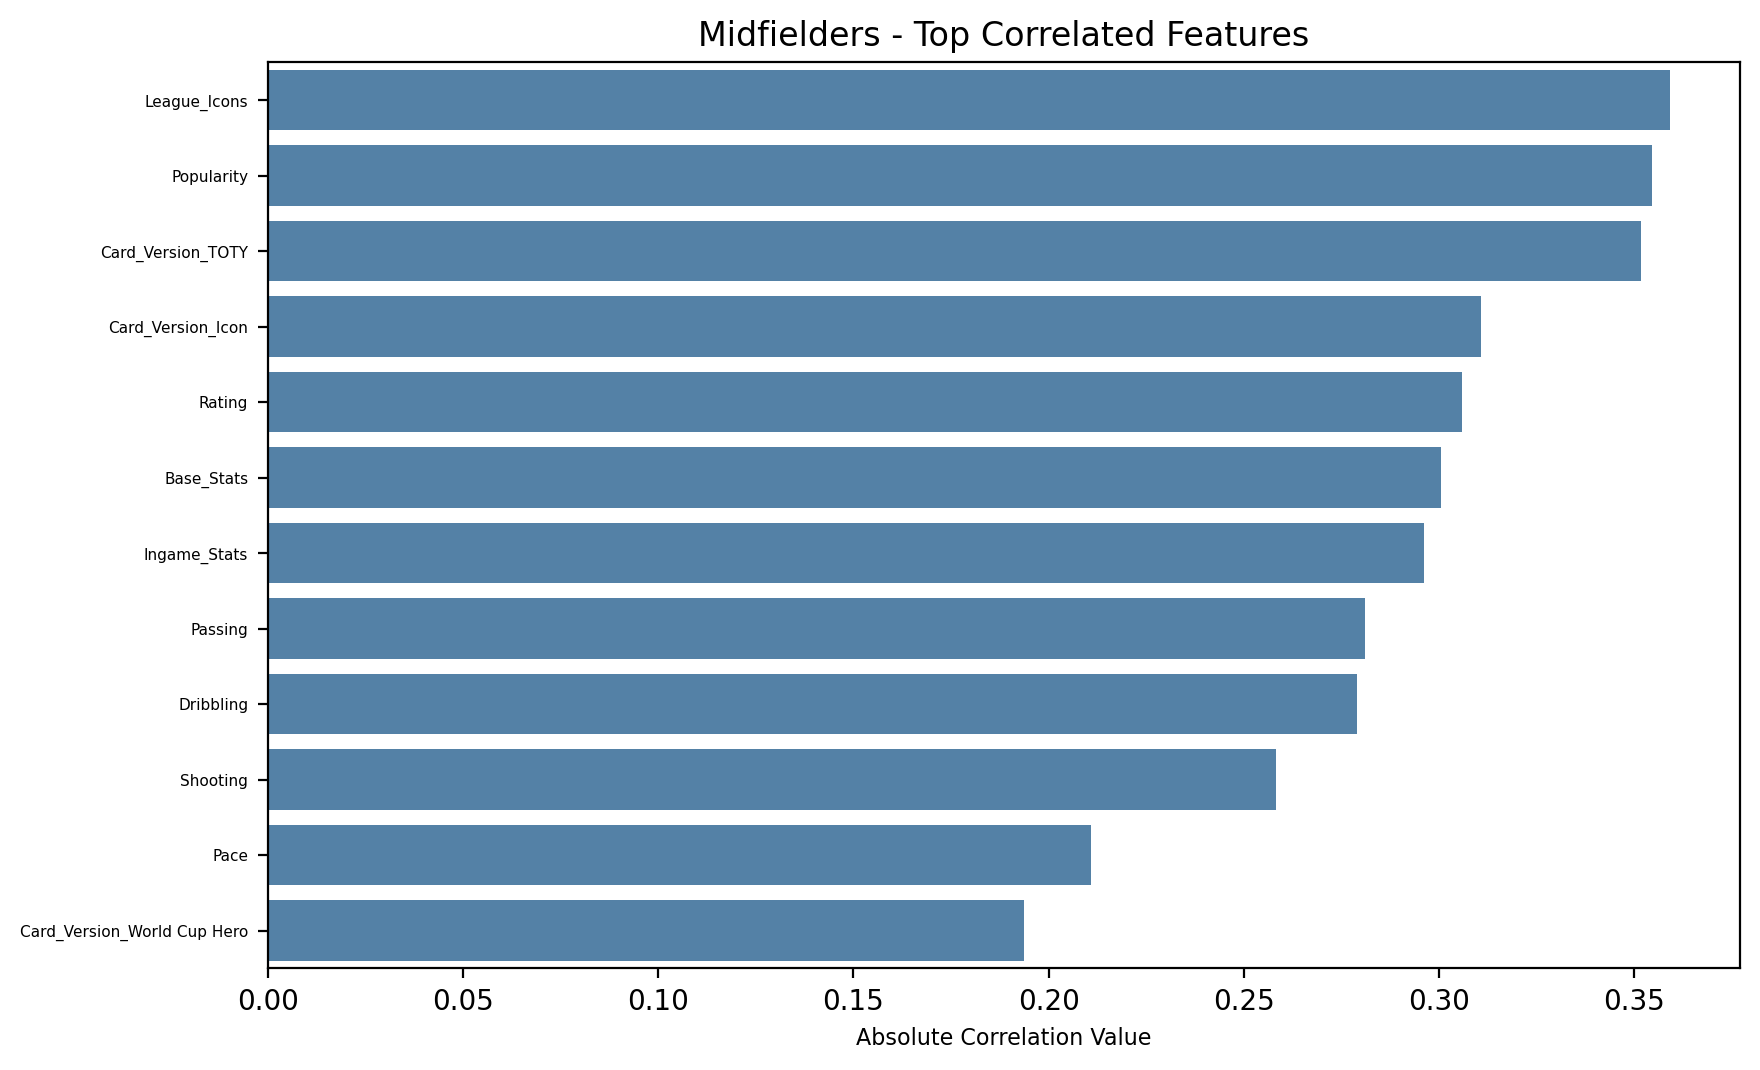

In [334]:
top_features_midfielders = midfielders.corr()['Price'].sort_values(ascending=False)[1:13]
plt.figure(figsize = (9.5, 6), dpi=200)
sns.barplot(x=top_features_midfielders.values, y=top_features_midfielders.index, color='steelblue')
plt.title('Midfielders - Top Correlated Features')
plt.xlabel("Absolute Correlation Value", fontdict={"fontsize": 8})
plt.yticks(fontsize=5.5)

plt.savefig('midfielders_features')

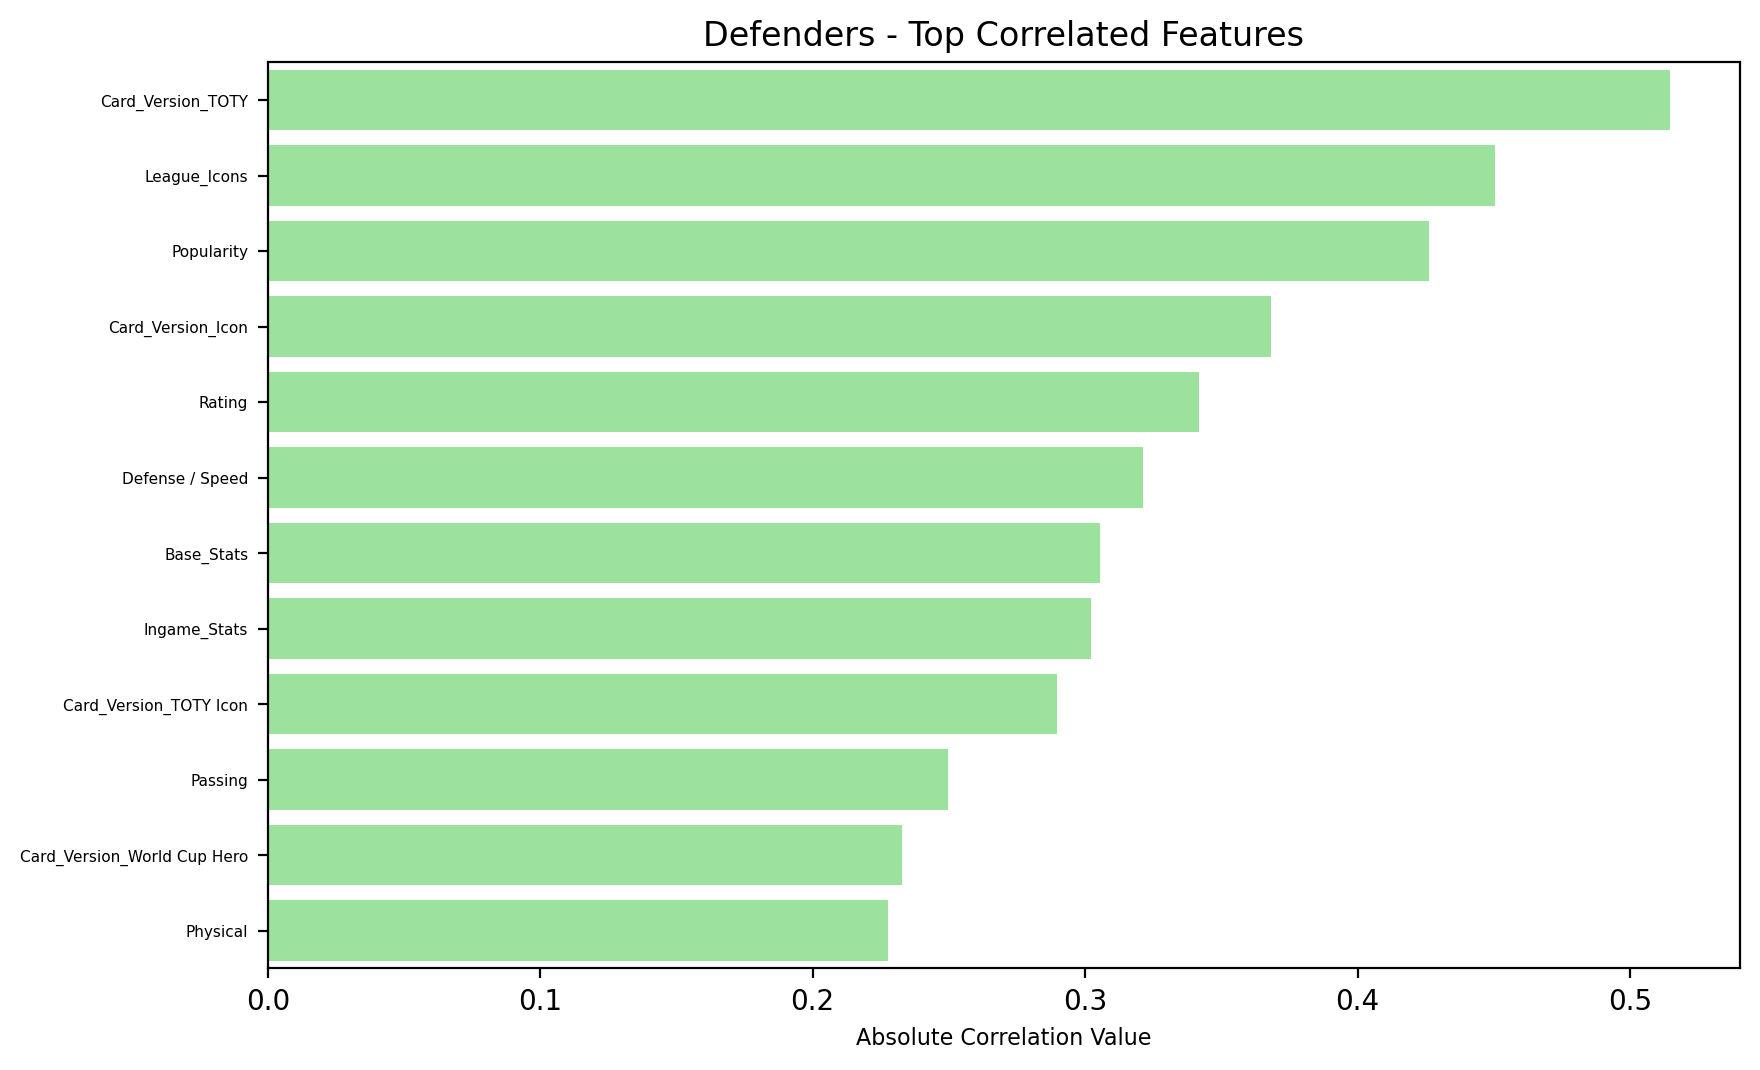

In [335]:
top_features_defenders = defenders.corr()['Price'].sort_values(ascending=False)[1:13]
plt.figure(figsize = (9.5, 6), dpi=200)
sns.barplot(x=top_features_defenders.values, y=top_features_defenders.index, color='lightgreen')
plt.title('Defenders - Top Correlated Features')
plt.xlabel("Absolute Correlation Value", fontdict={"fontsize": 8})
plt.yticks(fontsize=5.5)

plt.savefig('defenders_features')

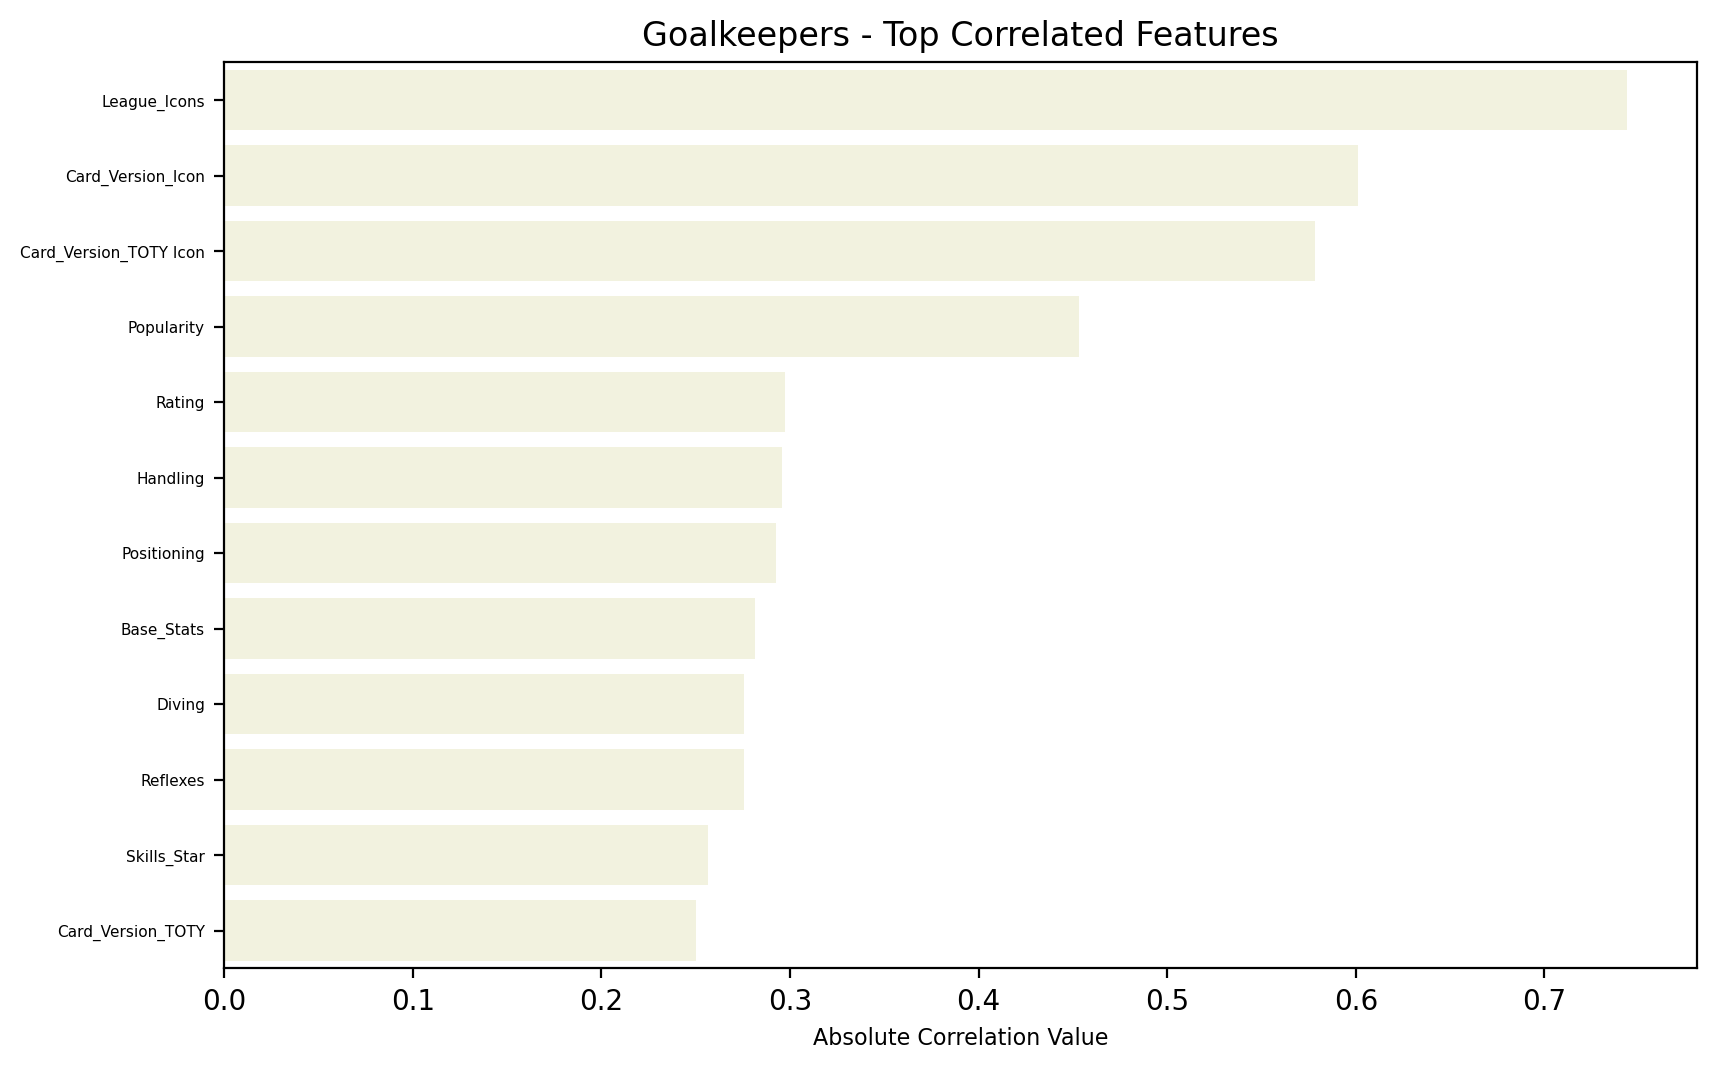

In [336]:
top_features_goalkeepers = abs(goalkeepers.corr()['Price'].sort_values(ascending=False)[1:13])
plt.figure(figsize = (9.5, 6), dpi=200)
sns.barplot(x=top_features_goalkeepers.values, y=top_features_goalkeepers.index, color='beige')
plt.title('Goalkeepers - Top Correlated Features')
plt.xlabel("Absolute Correlation Value", fontdict={"fontsize": 8})
plt.yticks(fontsize=5.5)

plt.savefig('goalkeepers_features')

In [337]:
# LINEAR REGRESSION

In [338]:
# INITIATING A RESULTS DATAFRAME
lr_results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
a=1

for position in position_list:
    
#     FINDING THE TOP 12 DORRELATED FEATURES
    features = list(position.corr()['Price'].sort_values(ascending=False)[1:13].keys())
    
#     CREATE X AND y, SEPERATE TARGET VALUE, 'Price'
    X = position[features]
    y = position['Price']
    
    
#     TRAIN-TEST SPLIT
    
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)
    
#     SCALING THE DATA
    from sklearn.preprocessing import RobustScaler
    
    scaler = RobustScaler()
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
#     LINEAR REGRESSION MODEL

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
#     MODEL PERFORMANCE EVALUATION 
    
    from sklearn.model_selection import cross_val_score
    
    cross_val_train = cross_val_score(model, X_train_scaled, y_train, scoring='neg_root_mean_squared_error', cv=5)
    cross_val_test = cross_val_score(model, X_test_scaled, y_test, scoring='neg_root_mean_squared_error', cv=5)
    
#     TRAIN RESULTS

    cross_val_train_mean = round(-(cross_val_train.mean()), 2)
    cross_val_train_max = round(-(cross_val_train.min()), 2)
    cross_val_train_min = round(-(cross_val_train.max()), 2)
    
#     TEST RESULTS

    cross_val_test_mean = round(-(cross_val_test.mean()), 2)
    cross_val_test_max = round(-(cross_val_train.min()), 2)
    cross_val_test_min = round(-(cross_val_train.max()), 2)
    
    
#     APPENDING RESULTS TO DATAFRAME AND CREATING VISUALS
    
    if a == 1:
        lr_results.loc[0] = ['Attack Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        lr_results.loc[1] = ['Attack Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]
    
    if a == 2:
        lr_results.loc[2] = ['Midfield Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        lr_results.loc[3] = ['Midfield Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]
    
    if a == 3:
        lr_results.loc[4] = ['Defence Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        lr_results.loc[5] = ['Defence Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]
    
    if a== 4:
        lr_results.loc[6] = ['Goalkeeper Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        lr_results.loc[7] = ['Goalkeeper Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]


 
    a+=1


In [339]:
lr_results

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Attack Train,439714.66,641803.16,155115.39
1,Attack Test,259901.83,641803.16,155115.39
2,Midfield Train,147115.60,231847.24,75649.35
3,Midfield Test,190496.49,231847.24,75649.35
4,Defence Train,69720.32,102169.42,41850.39
5,Defence Test,70384.71,102169.42,41850.39
6,Goalkeeper Train,31102.39,57029.70,7481.41
7,Goalkeeper Test,17868.47,57029.70,7481.41


In [340]:
# LINEAR REGRESSION RESULTS 

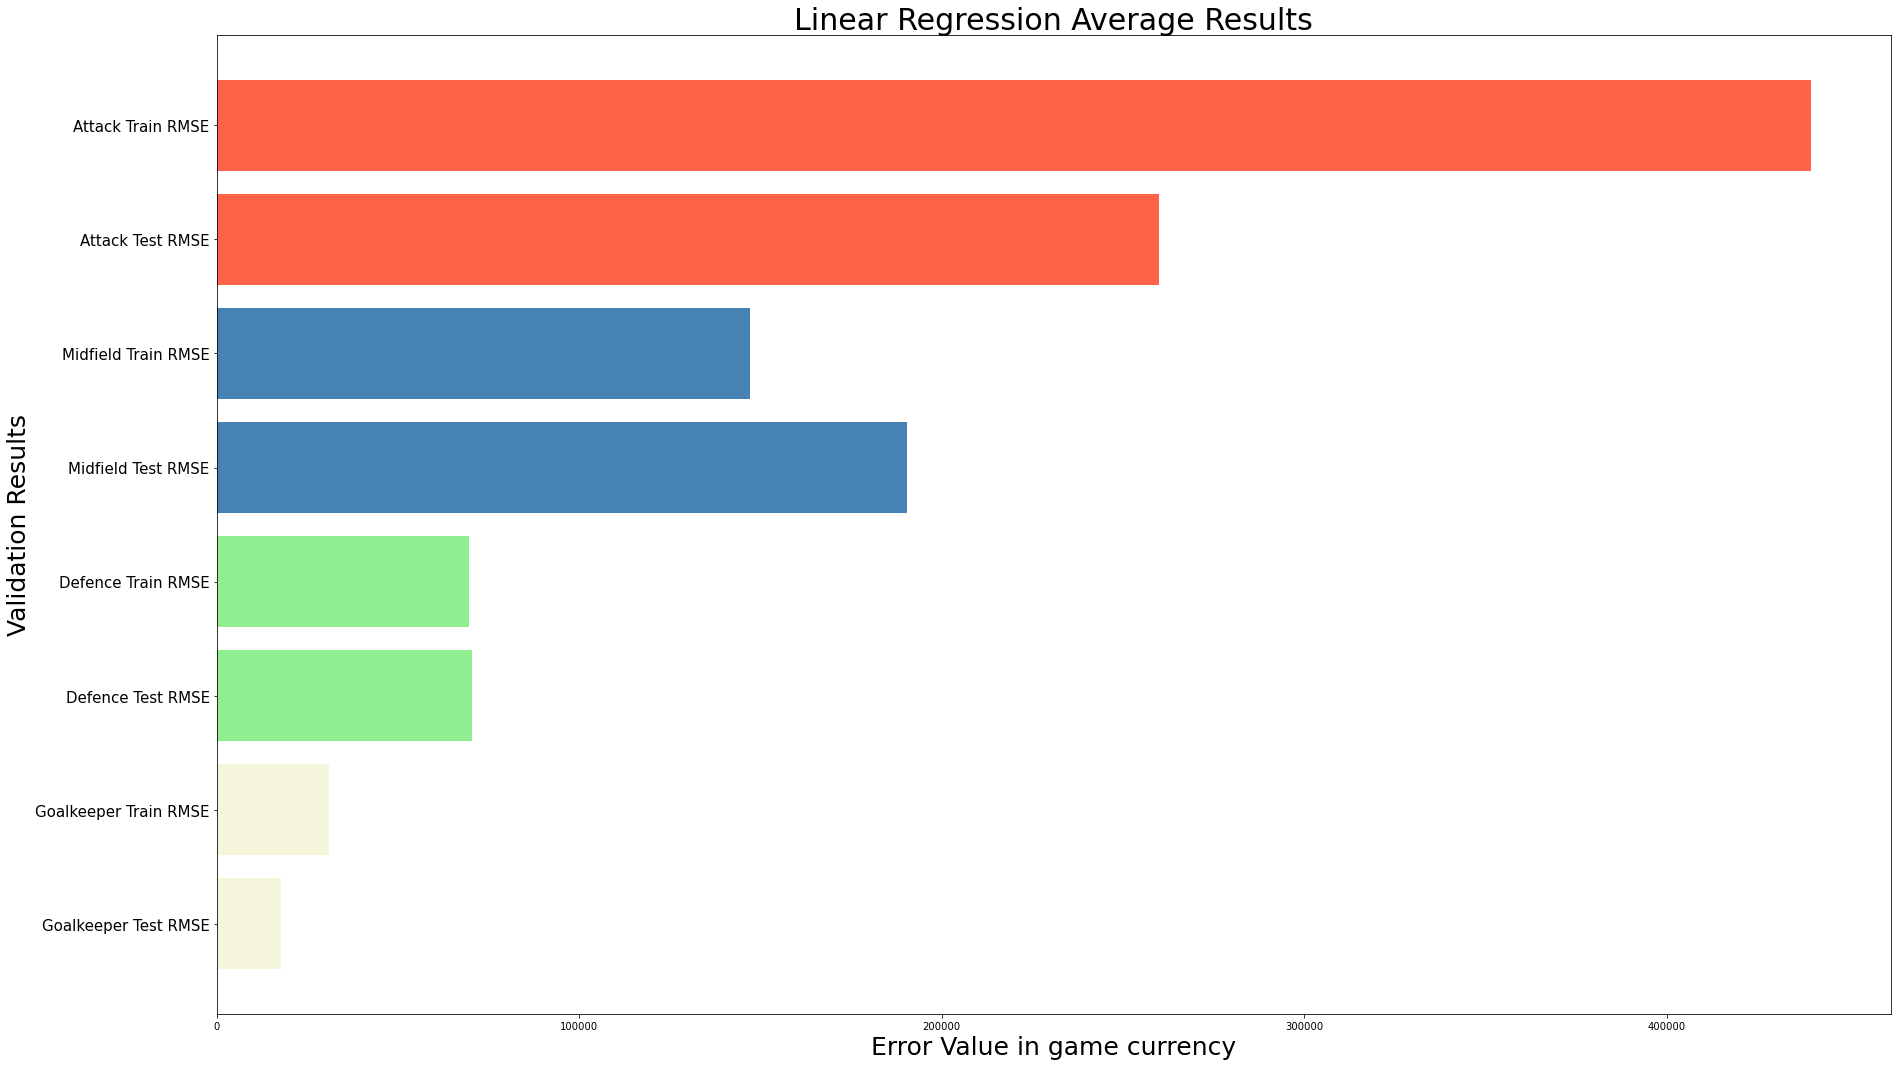

In [341]:
fig, ax = plt.subplots(figsize=(30,18))

y_ticks = [1,2,3,4,5,6,7,8]
y_labels = ['Goalkeeper Test RMSE','Goalkeeper Train RMSE','Defence Test RMSE','Defence Train RMSE',
            'Midfield Test RMSE','Midfield Train RMSE',
            'Attack Test RMSE','Attack Train RMSE',]

# GOALKEEPER RESULTS
goalkeeper_test_pos = 1
goalkeeper_test = lr_results['Avg RMSE'][7]
ax.barh(goalkeeper_test_pos, goalkeeper_test, color='beige')

goalkeeper_train_pos = 2
goalkeeper_train = lr_results['Avg RMSE'][6]
ax.barh(goalkeeper_train_pos, goalkeeper_train, color='beige')

# DEFENDER RESULTS
defender_test_pos = 3
defender_test = lr_results['Avg RMSE'][5]
ax.barh(defender_test_pos, defender_test, color='lightgreen')

defender_train_pos = 4
defender_train = lr_results['Avg RMSE'][4]
ax.barh(defender_train_pos, defender_train, color='lightgreen')


# MIDFIELDERS RESULTS
midfielder_test_pos = 5
midfielder_test = lr_results['Avg RMSE'][3]
ax.barh(midfielder_test_pos, midfielder_test, color='steelblue')

mifielder_train_pos = 6
midfielder_train = lr_results['Avg RMSE'][2]
ax.barh(mifielder_train_pos, midfielder_train, color='steelblue')


# ATTACKERS RESULTS
attacker_test_pos = 7
attacker_test = lr_results['Avg RMSE'][1]
ax.barh(attacker_test_pos, attacker_test, color='tomato')

attacker_train_pos = 8
attacker_train = lr_results['Avg RMSE'][0]
ax.barh(attacker_train_pos, attacker_train, color='tomato')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels,fontsize=15)
ax.set_xlabel('Error Value in game currency',fontsize=25)
ax.set_ylabel('Validation Results',fontsize=25)
ax.set_title('Linear Regression Average Results',fontsize=30)

plt.savefig('Linear_Results')

In [342]:
# LASSO REGRESSION

In [343]:
# INITIATING A RESULTS DATAFRAME
lasso_results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
b=1

for position in position_list:
    
#     FINDING THE TOP 12 DORRELATED FEATURES
    features = list(position.corr()['Price'].sort_values(ascending=False)[1:13].keys())
    
#     CREATE X AND y, SEPERATE TARGET VALUE, 'Price'
    X = position[features]
    y = position['Price']
    
    
#     TRAIN-TEST SPLIT
    
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)
    
#     SCALING THE DATA
    from sklearn.preprocessing import RobustScaler
    
    scaler = RobustScaler()
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
#     LASSO REGRESSION MODEL

    from sklearn.linear_model import Lasso
    model = Lasso()
    model.fit(X_train_scaled, y_train)
    
#     MODEL PERFORMANCE EVALUATION 
    
    from sklearn.model_selection import cross_val_score
    
    cross_val_train = cross_val_score(model, X_train_scaled, y_train, scoring='neg_root_mean_squared_error', cv=5)
    cross_val_test = cross_val_score(model, X_test_scaled, y_test, scoring='neg_root_mean_squared_error', cv=5)
    
#     TRAIN RESULTS

    cross_val_train_mean = round(-(cross_val_train.mean()), 2)
    cross_val_train_max = round(-(cross_val_train.min()), 2)
    cross_val_train_min = round(-(cross_val_train.max()), 2)
    
#     TEST RESULTS

    cross_val_test_mean = round(abs(cross_val_test.mean()), 2)
    cross_val_test_max = round(abs(cross_val_train.min()), 2)
    cross_val_test_min = round(abs(cross_val_train.max()), 2)
    
    
#     APPENDING RESULTS TO DATAFRAME AND CREATING VISUALS
    
    if b == 1:
        lasso_results.loc[0] = ['Attack Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        lasso_results.loc[1] = ['Attack Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]
    
    if b == 2:
        lasso_results.loc[2] = ['Midfield Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        lasso_results.loc[3] = ['Midfield Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]
    
    if b == 3:
        lasso_results.loc[4] = ['Defence Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        lasso_results.loc[5] = ['Defence Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]
    
    if b == 4:
        lasso_results.loc[6] = ['Goalkeeper Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        lasso_results.loc[7] = ['Goalkeeper Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]


 
    b+=1

In [344]:
lasso_results

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Attack Train,439716.59,641861.82,155119.37
1,Attack Test,259900.84,641861.82,155119.37
2,Midfield Train,147106.55,231774.64,75652.45
3,Midfield Test,190462.76,231774.64,75652.45
4,Defence Train,69723.68,102143.10,41846.21
5,Defence Test,70378.79,102143.10,41846.21
6,Goalkeeper Train,31096.75,57026.09,7415.92
7,Goalkeeper Test,17880.03,57026.09,7415.92


In [345]:
# LASSO REGRESSION RESULTS

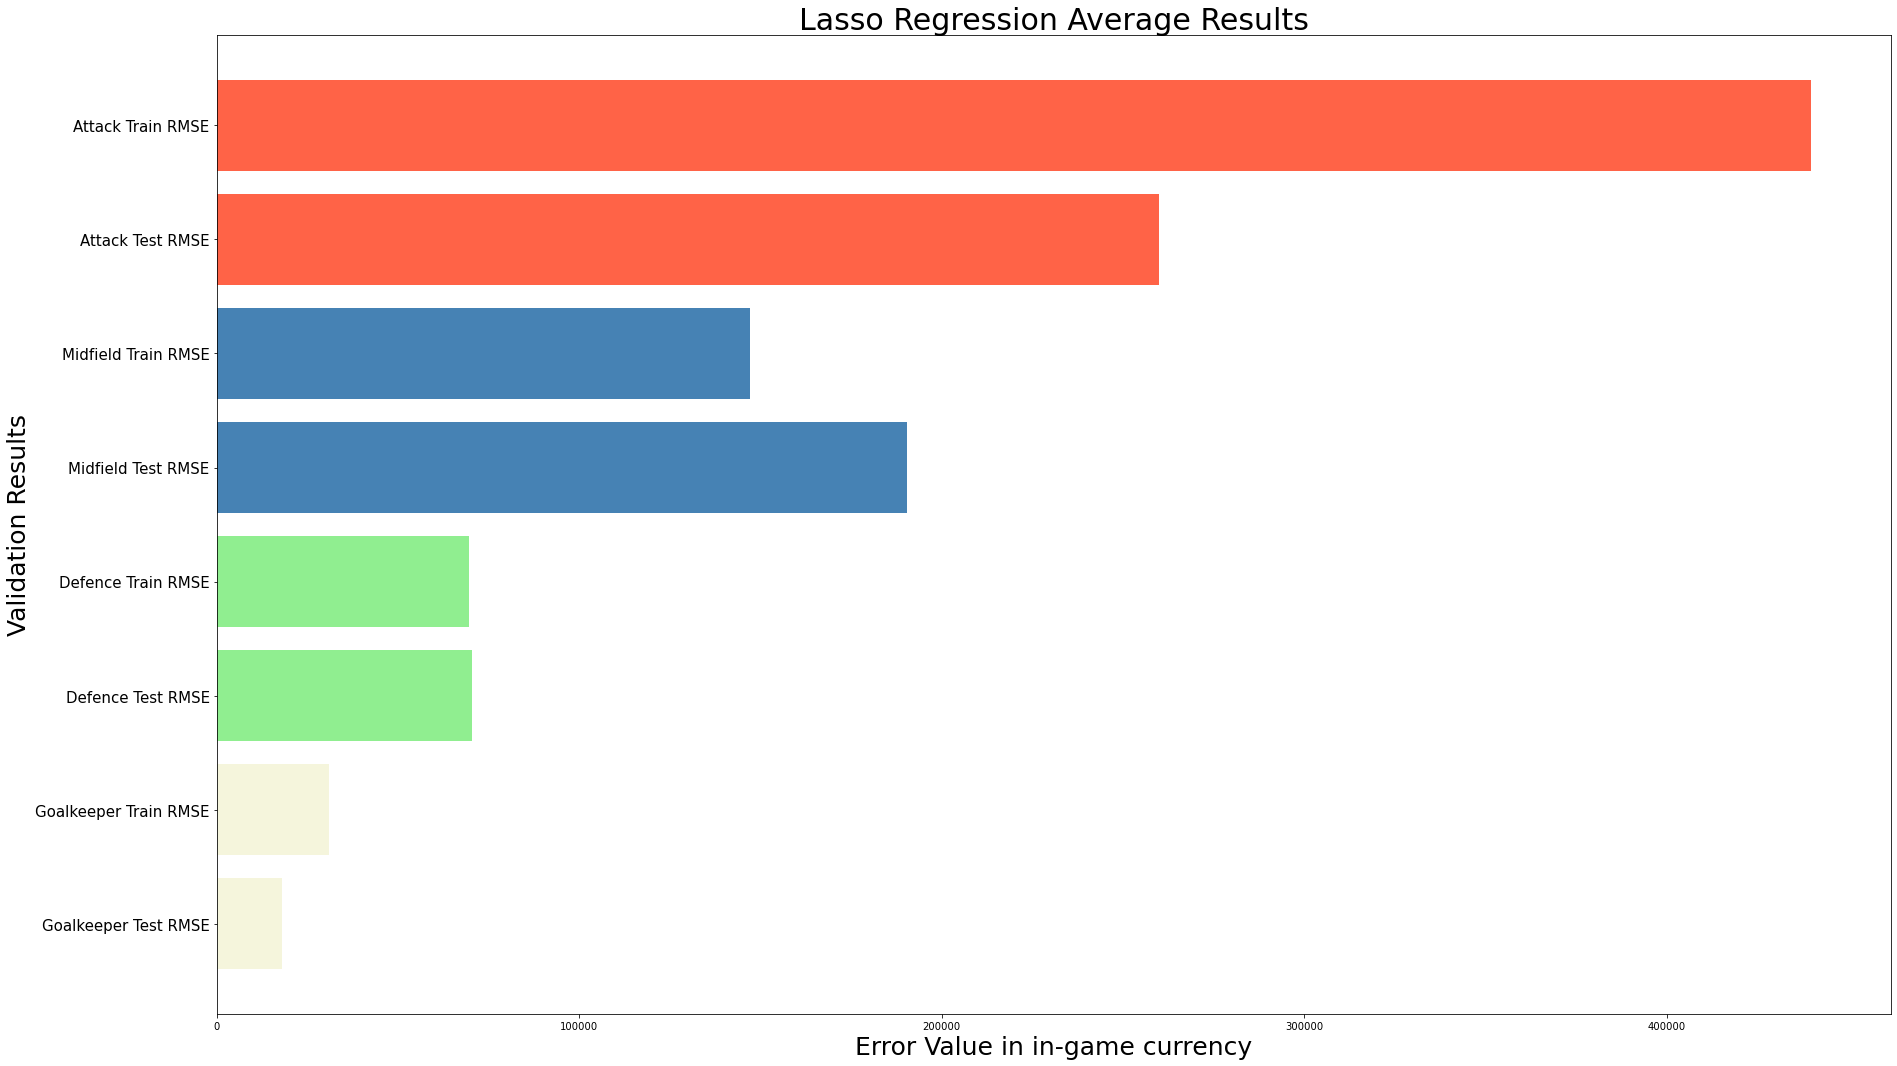

In [346]:
fig, ax = plt.subplots(figsize=(30,18))

y_ticks = [1,2,3,4,5,6,7,8]
y_labels = ['Goalkeeper Test RMSE','Goalkeeper Train RMSE','Defence Test RMSE','Defence Train RMSE',
            'Midfield Test RMSE','Midfield Train RMSE',
            'Attack Test RMSE','Attack Train RMSE',]

# GOALKEEPER RESULTS
goalkeeper_test_pos = 1
goalkeeper_test = lasso_results['Avg RMSE'][7]
ax.barh(goalkeeper_test_pos, goalkeeper_test, color='beige')

goalkeeper_train_pos = 2
goalkeeper_train = lasso_results['Avg RMSE'][6]
ax.barh(goalkeeper_train_pos, goalkeeper_train, color='beige')

# DEFENDER RESULTS
defender_test_pos = 3
defender_test = lasso_results['Avg RMSE'][5]
ax.barh(defender_test_pos, defender_test, color='lightgreen')

defender_train_pos = 4
defender_train = lasso_results['Avg RMSE'][4]
ax.barh(defender_train_pos, defender_train, color='lightgreen')


# MIDFIELDERS RESULTS
midfielder_test_pos = 5
midfielder_test = lasso_results['Avg RMSE'][3]
ax.barh(midfielder_test_pos, midfielder_test, color='steelblue')

mifielder_train_pos = 6
midfielder_train = lasso_results['Avg RMSE'][2]
ax.barh(mifielder_train_pos, midfielder_train, color='steelblue')


# ATTACKERS RESULTS
attacker_test_pos = 7
attacker_test = lasso_results['Avg RMSE'][1]
ax.barh(attacker_test_pos, attacker_test, color='tomato')

attacker_train_pos = 8
attacker_train = lasso_results['Avg RMSE'][0]
ax.barh(attacker_train_pos, attacker_train, color='tomato')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels,fontsize=15)
ax.set_xlabel('Error Value in in-game currency',fontsize=25)
ax.set_ylabel('Validation Results',fontsize=25)
ax.set_title('Lasso Regression Average Results',fontsize=30)

plt.savefig('Lasso_Results')

In [347]:
# RIDGE REGRESSION

In [348]:
# INITIATING A RESULTS DATAFRAME
ridge_results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
c=1

for position in position_list:
    
#     FINDING THE TOP 12 DORRELATED FEATURES
    features = list(position.corr()['Price'].sort_values(ascending=False)[1:13].keys())
    
#     CREATE X AND y, SEPERATE TARGET VALUE, 'Price'
    X = position[features]
    y = position['Price']
    
    
#     TRAIN-TEST SPLIT
    
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)
    
#     SCALING THE DATA
    from sklearn.preprocessing import RobustScaler
    
    scaler = RobustScaler()
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
#     LASSO REGRESSION MODEL

    from sklearn.linear_model import Ridge
    model = Ridge(alpha=0.1)
    model.fit(X_train_scaled, y_train)
    
#     MODEL PERFORMANCE EVALUATION 
    
    from sklearn.model_selection import cross_val_score
    
    cross_val_train = cross_val_score(model, X_train_scaled, y_train, scoring='neg_root_mean_squared_error', cv=5)
    cross_val_test = cross_val_score(model, X_test_scaled, y_test, scoring='neg_root_mean_squared_error', cv=5)
    
#     TRAIN RESULTS

    cross_val_train_mean = round(-(cross_val_train.mean()), 2)
    cross_val_train_max = round(-(cross_val_train.min()), 2)
    cross_val_train_min = round(-(cross_val_train.max()), 2)
    
#     TEST RESULTS

    cross_val_test_mean = round(-(cross_val_test.mean()), 2)
    cross_val_test_max = round(-(cross_val_train.min()), 2)
    cross_val_test_min = round(-(cross_val_train.max()), 2)
    
    
#     APPENDING RESULTS TO DATAFRAME AND CREATING VISUALS
    
    if c == 1:
        ridge_results.loc[0] = ['Attack Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        ridge_results.loc[1] = ['Attack Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]
    
    if c == 2:
        ridge_results.loc[2] = ['Midfield Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        ridge_results.loc[3] = ['Midfield Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]
    
    if c == 3:
        ridge_results.loc[4] = ['Defence Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        ridge_results.loc[5] = ['Defence Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]
    
    if c == 4:
        ridge_results.loc[6] = ['Goalkeeper Train',  cross_val_train_mean, cross_val_train_max, cross_val_train_min]
        ridge_results.loc[7] = ['Goalkeeper Test',  cross_val_test_mean, cross_val_test_max, cross_val_test_min]


 
    c+=1

In [349]:
ridge_results

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Attack Train,437417.84,647118.24,155452.04
1,Attack Test,260510.99,647118.24,155452.04
2,Midfield Train,146230.06,225153.75,75692.45
3,Midfield Test,187831.83,225153.75,75692.45
4,Defence Train,70046.98,101085.79,41665.66
5,Defence Test,70183.98,101085.79,41665.66
6,Goalkeeper Train,30773.91,57177.29,4201.28
7,Goalkeeper Test,18178.82,57177.29,4201.28


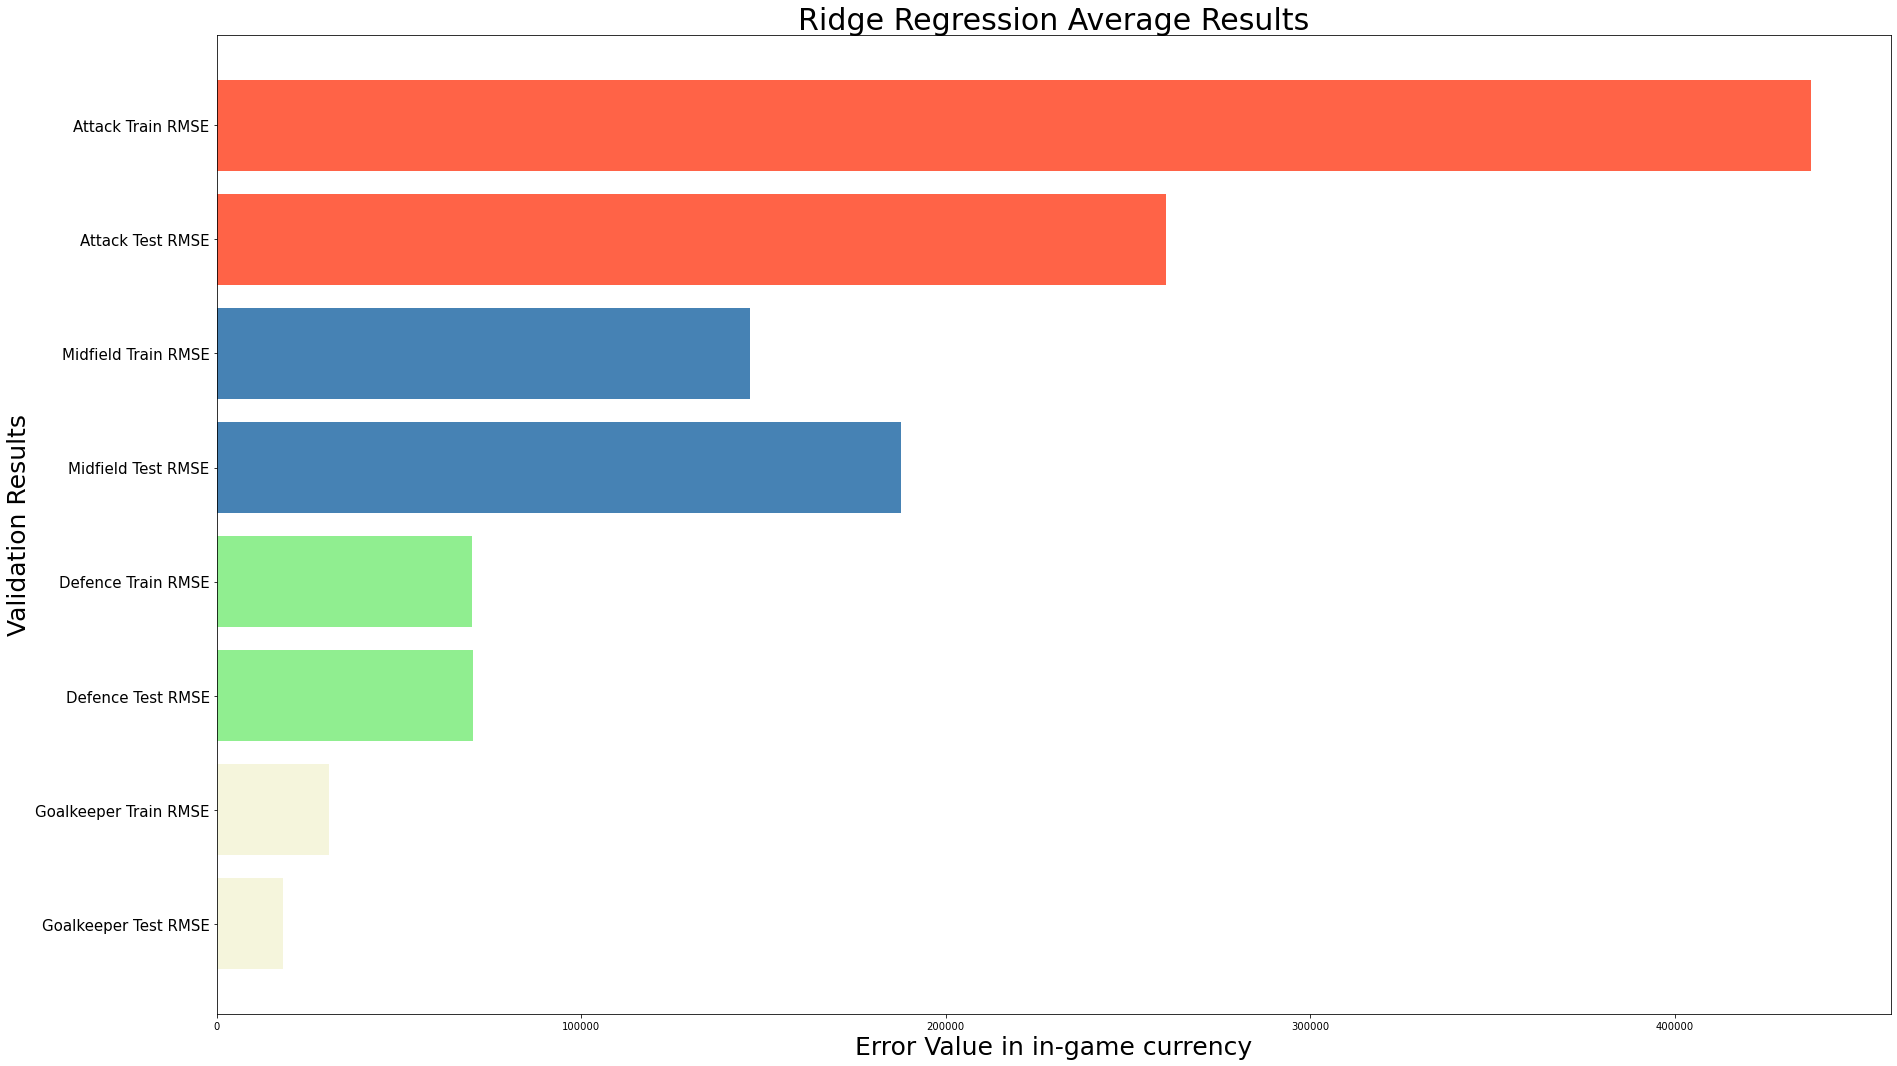

In [350]:
fig, ax = plt.subplots(figsize=(30,18))

y_ticks = [1,2,3,4,5,6,7,8]
y_labels = ['Goalkeeper Test RMSE','Goalkeeper Train RMSE','Defence Test RMSE','Defence Train RMSE',
            'Midfield Test RMSE','Midfield Train RMSE',
            'Attack Test RMSE','Attack Train RMSE',]

# GOALKEEPER RESULTS
goalkeeper_test_pos = 1
goalkeeper_test = ridge_results['Avg RMSE'][7]
ax.barh(goalkeeper_test_pos, goalkeeper_test, color='beige')

goalkeeper_train_pos = 2
goalkeeper_train = ridge_results['Avg RMSE'][6]
ax.barh(goalkeeper_train_pos, goalkeeper_train, color='beige')

# DEFENDER RESULTS
defender_test_pos = 3
defender_test = ridge_results['Avg RMSE'][5]
ax.barh(defender_test_pos, defender_test, color='lightgreen')

defender_train_pos = 4
defender_train = ridge_results['Avg RMSE'][4]
ax.barh(defender_train_pos, defender_train, color='lightgreen')


# MIDFIELDERS RESULTS
midfielder_test_pos = 5
midfielder_test = ridge_results['Avg RMSE'][3]
ax.barh(midfielder_test_pos, midfielder_test, color='steelblue')

mifielder_train_pos = 6
midfielder_train = ridge_results['Avg RMSE'][2]
ax.barh(mifielder_train_pos, midfielder_train, color='steelblue')


# ATTACKERS RESULTS
attacker_test_pos = 7
attacker_test = ridge_results['Avg RMSE'][1]
ax.barh(attacker_test_pos, attacker_test, color='tomato')

attacker_train_pos = 8
attacker_train = ridge_results['Avg RMSE'][0]
ax.barh(attacker_train_pos, attacker_train, color='tomato')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels,fontsize=15)
ax.set_xlabel('Error Value in in-game currency',fontsize=25)
ax.set_ylabel('Validation Results',fontsize=25)
ax.set_title('Ridge Regression Average Results',fontsize=30)

plt.savefig('Ridge_Results')